In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/gcolab/NYU_dl_course')

Mounted at /content/drive


In [25]:
# Import dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
from res.plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [5]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [6]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [8]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)

    y = x.pow(2) + 4*x - 2
    return x,y

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    
    y = x.pow(3) + 4*x.pow(2) - 3

    return x, y

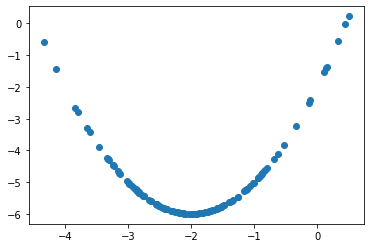

In [10]:
# Generate the data with 128 datapoints
x, y = quadratic_data_generator(128)
plt.scatter(x,y)
plt.show()

In [12]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1, bias=True)

    def forward(self, x):
        return self.fc1(x)

In [32]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity

dim_hidden = 20

class Linear_1H(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, dim_hidden)
        self.fc2 = nn.Linear(dim_hidden, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [33]:
# Define a Linear Classifier with a two hidden layers of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, dim_hidden)
        self.fc2 = nn.Linear(dim_hidden, dim_hidden)
        self.fc3 = nn.Linear(dim_hidden, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [15]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    
    # Define MSE loss function
    criterion = nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
        y_pred = model(x)
        
        # TODO: Compute loss in terms of predicted and true y
        loss = criterion(y, y_pred)

        # TODO: Zero gradient
        optimizer.zero_grad()
        
        # TODO: call backward on loss
        loss.backward()

        # TODO: step the optimizer
        optimizer.step()
        
        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

In [36]:
x, y = quadratic_data_generator(128)

Epoch 100 loss: 4.01838493347168
Epoch 200 loss: 3.142832040786743
Epoch 300 loss: 2.7379815578460693
Epoch 400 loss: 2.55078125
Epoch 500 loss: 2.4642207622528076
Epoch 600 loss: 2.4241957664489746
Epoch 700 loss: 2.4056882858276367
Epoch 800 loss: 2.3971312046051025
Epoch 900 loss: 2.393174171447754
Epoch 1000 loss: 2.3913443088531494


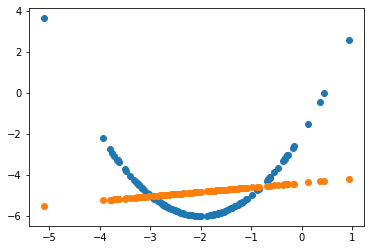

In [38]:
# 0H model on quadratic data
model = Linear_0H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 1.672974944114685
Epoch 200 loss: 0.9297366142272949
Epoch 300 loss: 0.5210822224617004
Epoch 400 loss: 0.32612985372543335
Epoch 500 loss: 0.23103733360767365
Epoch 600 loss: 0.1732213795185089
Epoch 700 loss: 0.1347334235906601
Epoch 800 loss: 0.11106546968221664
Epoch 900 loss: 0.09523170441389084
Epoch 1000 loss: 0.08315767347812653


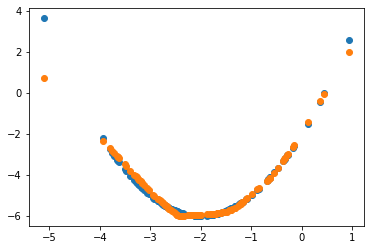

In [39]:
# 1H model on quadratic data
model = Linear_1H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 1.6195391416549683
Epoch 200 loss: 0.6988844871520996
Epoch 300 loss: 0.6418460607528687
Epoch 400 loss: 0.24776406586170197
Epoch 500 loss: 0.16588498651981354
Epoch 600 loss: 0.11194223910570145
Epoch 700 loss: 0.09305358678102493
Epoch 800 loss: 0.05596953257918358
Epoch 900 loss: 0.022264273837208748
Epoch 1000 loss: 0.018386663869023323


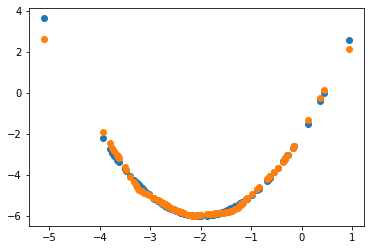

In [40]:
# 2H model on quadratic data
model = Linear_2H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [43]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

Epoch 100 loss: 26.808185577392578
Epoch 200 loss: 26.631925582885742
Epoch 300 loss: 26.549427032470703
Epoch 400 loss: 26.510814666748047
Epoch 500 loss: 26.492740631103516
Epoch 600 loss: 26.48427963256836
Epoch 700 loss: 26.48031997680664
Epoch 800 loss: 26.478469848632812
Epoch 900 loss: 26.477602005004883
Epoch 1000 loss: 26.477195739746094


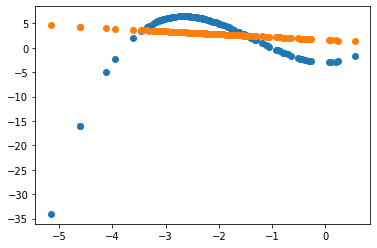

In [44]:
# 0H model on cubic data
model = Linear_0H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 22.239809036254883
Epoch 200 loss: 11.325094223022461
Epoch 300 loss: 5.699132919311523
Epoch 400 loss: 3.4602575302124023
Epoch 500 loss: 1.7737047672271729
Epoch 600 loss: 1.2430357933044434
Epoch 700 loss: 1.0295099020004272
Epoch 800 loss: 0.9132016897201538
Epoch 900 loss: 0.8250713348388672
Epoch 1000 loss: 0.7556445598602295


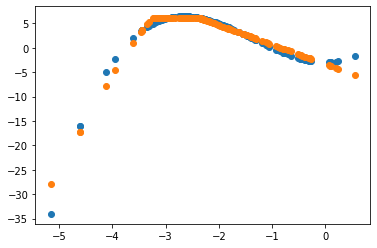

In [45]:
# 1H model on cubic data
model = Linear_1H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 16.20360565185547
Epoch 200 loss: 7.501485347747803
Epoch 300 loss: 3.00400710105896
Epoch 400 loss: 3.028059959411621
Epoch 500 loss: 1.1600315570831299
Epoch 600 loss: 1.1697320938110352
Epoch 700 loss: 0.7588006854057312
Epoch 800 loss: 0.5284460186958313
Epoch 900 loss: 1.4733123779296875
Epoch 1000 loss: 0.9251002073287964


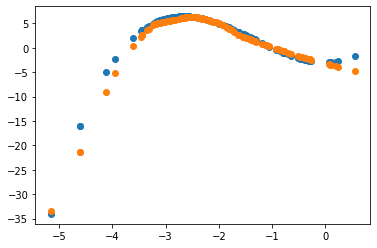

In [46]:
# 2H model on cubic data
model = Linear_2H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()